In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [66]:
df_t = pd.read_csv('ML_10K_clinical_input.csv', header=0,index_col = 0,sep = ",")

/data/jupyter/jupyterenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,2

In [67]:
df = df_t.T
df.iloc[:,0:10002]

ID,Labels,Age,A2M,A2M-AS1,AACS,AAK1,AASDHPPT,AASS,AATK,ABAT,...,ZSCAN21,ZSCAN31,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZUP1,ZWILCH,ZWINT,ZYX
X.R0.ST_E09138.CEL.gz,ST,NaN,12.62397422,6.126825088,8.211777054,9.648960704,10.19846634,6.905506264,9.803746121,10.02300189,...,8.259,6.17091,7.41166,10.1648,8.70549,9.50192,7.36807,8.38501,9.09942,9.94449
X.R0.ST_E09233.CEL.gz,ST,52,11.91767494,5.676881709,7.902763754,9.653766873,10.10826124,7.919322266,9.172572781,11.36492497,...,8.64065,6.29044,6.83383,9.99073,7.93391,9.05119,7.3403,8.63938,8.8091,10.3302
X.R0.ST_E09405.CEL.gz,ST,42,12.83532723,5.939029985,7.803722264,9.576499319,9.298863954,6.532358372,9.578691404,9.713904208,...,7.32435,6.47703,7.04565,9.69169,8.04095,9.09762,6.8042,8.41271,8.82259,9.76602
X.R0.ST_E09655.CEL.gz,ST,52,11.49270231,5.94923515,8.376619785,9.682384467,10.52940269,7.097704683,9.399987861,11.23726955,...,7.8979,6.661,7.41609,9.86056,8.68596,8.87215,6.95591,8.10693,8.06742,9.37891
X.R0.ST_E09825.CEL.gz,ST,82,12.34572842,5.459520763,8.642515378,9.50716611,10.57211418,8.128222118,9.078384869,11.60603223,...,8.98383,6.56042,8.3174,10.6753,9.48167,9.23013,6.9937,9.499,10.5165,9.41555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GBM_GSE_ST.NA.GSM1299528,ST,NaN,10.34991981,6.068712655,8.37819014,10.15140706,9.696483203,8.788481871,8.672783612,10.25408953,...,8.33723,5.71583,7.353,9.31592,8.093,9.59661,7.06235,8.38738,8.07364,10.1019
GBM_GSE_ST.NA.GSM1299529,ST,NaN,13.59362985,6.881016895,8.194367493,9.948510429,10.75414905,7.332131409,8.554919955,11.39616033,...,7.48439,6.42028,7.80983,10.4007,8.16855,9.46485,7.17333,9.27545,9.92592,9.20176
GBM_GSE_ST.NA.GSM1299530,ST,NaN,12.22808958,5.87230857,8.143586329,9.637675348,11.13712788,6.888811025,9.204025933,10.93880033,...,8.57857,6.50055,8.16991,10.551,8.47626,9.26235,7.52899,8.11741,9.06121,9.65792
GBM_GSE_ST.NA.GSM1299531,ST,NaN,12.3604301,5.504530044,7.984495969,10.34768837,9.910817163,6.426852211,9.192186238,9.369612149,...,7.93147,5.8619,6.68656,9.99422,7.53239,8.18744,5.7438,8.10487,8.45207,10.4207


In [68]:
df = df_t.T
X = df.iloc[:,1:10002]
Y = df.iloc[:,0]

In [69]:
X.shape

(249, 10001)

In [70]:
#Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
X = imputer.fit_transform(X,Y)

In [71]:
from sklearn.preprocessing import LabelEncoder
Y = LabelEncoder().fit_transform(Y)

In [72]:
np.random.seed(120) 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [73]:
X_train.shape

(199, 10001)

array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>, <AxesSubplot:>]], dtype=object)

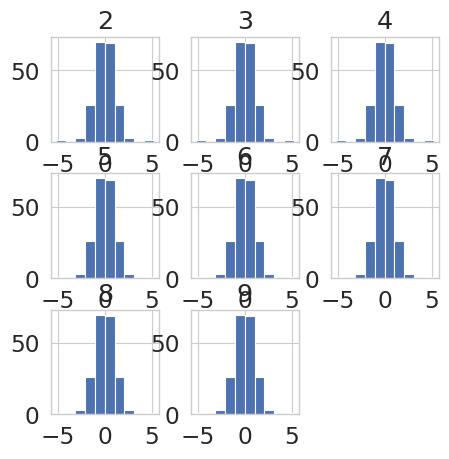

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_train = sc.transform(X_train)

# perform a normal quantile transform of the dataset
# n_quantiles should less than or equal to number of samples, default is 1000
from sklearn.preprocessing import QuantileTransformer
trans = QuantileTransformer(n_quantiles=199, output_distribution='normal')
X_train = trans.fit_transform(X_train)

# save the scaler
from pickle import dump
dump(sc, open('standardize_clinical.pkl','wb'))
dump(trans, open('scaler_clinical.pkl', 'wb'))

x_um = pd.DataFrame(X_train)
l = x_um.iloc[:,2:10]
l.hist()


In [15]:
# load the scaler
from pickle import load
scaler = load(open('standardize_clinical.pkl', 'rb'))
trans = load(open('scaler_clinical.pkl','rb'))
# transform the test dataset

X_test_scaled = scaler.transform(X_test)
X_test_trans = trans.transform(X_test_scaled)

In [16]:
np.random.seed(120) 

from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_resampled, Y_resampled = SMOTE().fit_resample(X_train,Y_train)
print(sorted(Counter(Y_resampled).items()))

[(0, 139), (1, 139)]


# 1. Random Forest parameter tuning

In [20]:
np.random.seed(120)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import balanced_accuracy_score

scorers = {
    'recall_score': make_scorer(recall_score, average = 'micro'),
    'accuracy_score': make_scorer(accuracy_score),
    'roc_auc_score': make_scorer(roc_auc_score),
    'f1_score':make_scorer(f1_score,average='micro'),
    'mean_squared_error':make_scorer(mean_squared_error),
    'balanced_accuracy_score':make_scorer(balanced_accuracy_score)
    }

parameters = {'n_estimators':[500,1000,2000,5000],'criterion':('entropy','gini'), 'max_depth':[1,2]}
cv= StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
clf1 =  GridSearchCV(RandomForestClassifier(random_state=0),cv=cv, param_grid = parameters,scoring =scorers , refit ='roc_auc_score')

clf1.fit(X_resampled,Y_resampled)

import pandas as pd

results_df = pd.DataFrame(clf1.cv_results_)
results_df.to_csv('RF_clinical_CV5_param_tuning.csv')
results_df = results_df.sort_values(by=['rank_test_accuracy_score'])
results_df = (
    results_df
    .set_index(results_df["params"].apply(
        lambda x: "_".join(str(val) for val in x.values()))
    )
    .rename_axis('kernel')
)
results_df[
    ['params', 'rank_test_accuracy_score', 'mean_test_accuracy_score', 'std_test_accuracy_score']
]


,params,rank_test_accuracy_score,mean_test_accuracy_score,std_test_accuracy_score
kernel,,,,
entropy_2_2000,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",1,0.771429,0.058029
entropy_2_5000,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",1,0.771429,0.058029
entropy_2_500,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",3,0.764286,0.048445
entropy_2_1000,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",3,0.764286,0.058029
gini_2_1000,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",5,0.757143,0.072843
gini_2_2000,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",6,0.750000,0.081441
gini_2_5000,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",7,0.742857,0.091473
gini_2_500,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",8,0.735714,0.066240
entropy_1_1000,"{'criterion': 'entropy', 'max_depth': 1, 'n_es...",9,0.678571,0.074915


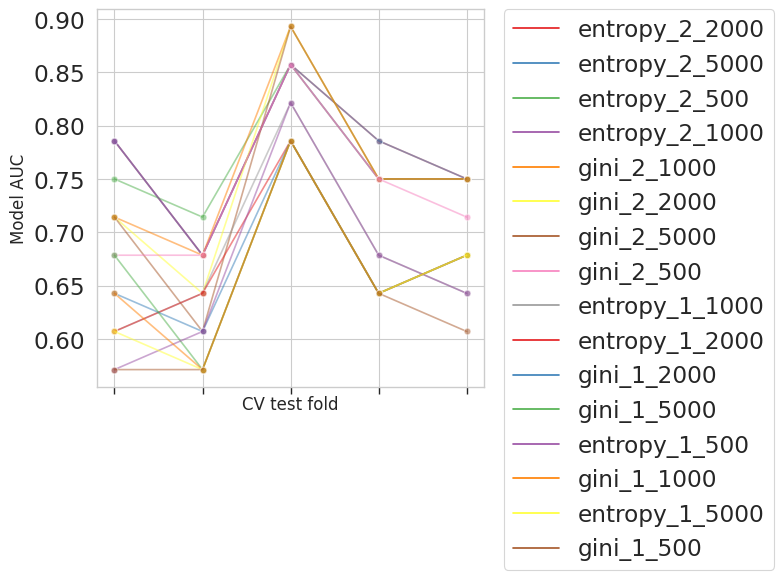

In [21]:
# create df of model scores ordered by perfomance
#%config InlineBackend.print_figure_kwargs={'bbox_inches':None}  ## To prevent cropping of the saved image file

import seaborn as sns

model_scores = results_df.filter(regex=r'split\d*_test_accuracy_score')

# plot 30 examples of dependency between cv fold and AUC scores
#sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(5,5)
plt.rcParams['figure.dpi'] = 100
text_scaling=1.9
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=text_scaling) 

#sns.set(rc={'figure.figsize':(5,5)})

fig, ax = plt.subplots(1,1)
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax
)
ax.set_xlabel("CV test fold", size=12, labelpad=6)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)

# Put the legend out of the figure


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 

plt.savefig('clf1_RandomForest_Param_tuning.jpg', dpi=100)
plt.show()


# print correlation of AUC scores across folds
#print(f"Correlation of models:\n {model_scores.transpose().corr()}")


In [47]:
np.random.seed(120)

clf3 = RandomForestClassifier(n_estimators = 2000, criterion = "entropy",max_depth = 2,random_state=0)

clf3.fit(X_resampled,Y_resampled)

# save the model

from pickle import dump
dump(clf3, open('RF_clinical_deploy.pkl', 'wb'))

0.8648648648648649
0.8
0.7401247401247402


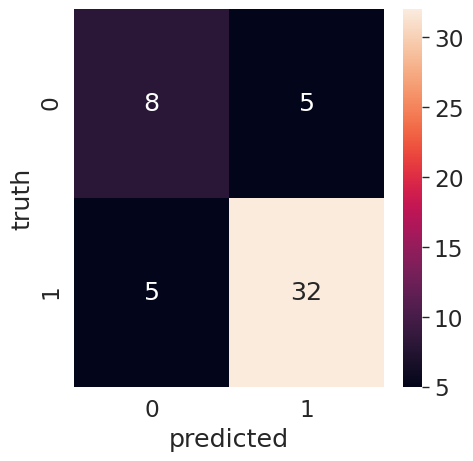

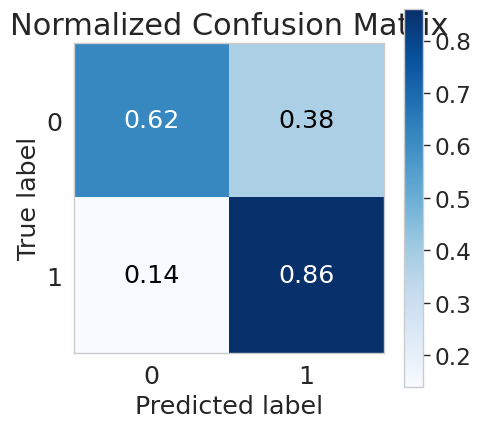

In [48]:
from pickle import load
RF = load(open('RF_clinical_deploy.pkl', 'rb'))

# make predictions on the test set
Y_pred = RF.predict(X_test_trans)

## Scoring metrices

from sklearn.metrics import f1_score
print(f1_score(Y_test, Y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test, Y_pred))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)


import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.savefig('RandomForest_clinical_CM_test_result')
plt.show()



from sklearn.model_selection import cross_val_predict
predictions_1 = cross_val_predict(clf3,X_resampled,Y_resampled)
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test,Y_pred, normalize=True)
#skplt.savefig('RandomForest_normalized(CM)_test_result')
plt.savefig('RandomForest_clinical_Normalized(CM)_test_result')
plt.show()


In [24]:
importance = clf3.feature_importances_
df4 = pd.DataFrame(importance)
df4.to_csv('RF_clinical_importance.csv')

In [35]:
df5 = pd.DataFrame(df.columns)
df5.to_csv('RF_Clinical_features.csv')

In [33]:
feat_labels

array([], shape=(0, 10002), dtype=object)

# Feature_Selection

0.5
0.8505747126436781
0.74
n=2000


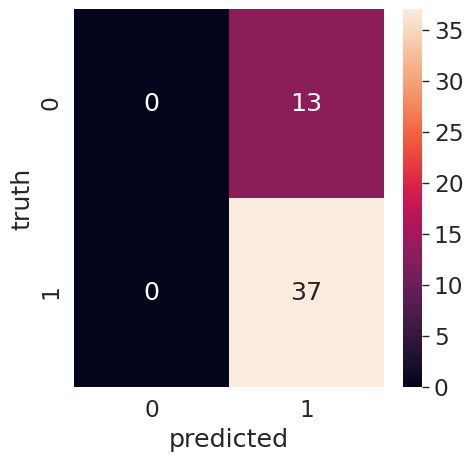

In [41]:
#################################################################
np.random.seed(120)


selection = SelectFromModel(clf3, max_features = 2000, prefit=True)
select_X_train = selection.transform(X_resampled)

# train model
np.random.seed(120)
selection_model = RandomForestClassifier(n_estimators = 500, criterion = "entropy",max_depth = 2,random_state=0)
selection_model.fit(select_X_train, Y_resampled)

# eval model
select_X_test = selection.transform(X_test)
predictions = selection_model.predict(select_X_test)

#print(accuracy_score = accuracy_score(Y_test, predictions))
#print(f1_score = f1_score(Y_test, predictions))
#print(roc_auc_score = roc_auc_score(Y_test, predictions))


from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test, predictions))

from sklearn.metrics import f1_score
print(f1_score(Y_test, predictions))

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)

import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

print("n=%d" % (select_X_train.shape[1]))



# EXTERNAL DATASET 

In [49]:
# features to be selected
cols = df_t.index

df7 = pd.read_csv('ML_test_external_1_clinical.csv', header=0,index_col = 0,sep = ",")
df7 = pd.DataFrame(df7.T)

#choose columns of relevance from dataframe! 

df9 = df7[cols]

In [50]:
df9.shape

(16, 10002)

In [51]:
X_test_external = df9.iloc[:,1:10002]

In [52]:
# load the model
from pickle import load
RF = load(open('RF_clinical_deploy.pkl', 'rb'))

# load the scaler n transform
from pickle import load
scaler = load(open('standardize_clinical.pkl', 'rb'))
trans = load(open('scaler_clinical.pkl','rb'))

X_test_external_scaled = scaler.transform(X_test_external)
X_test_external_trans = trans.transform(X_test_external_scaled)

# make predictions on the test set
yhat = RF.predict(X_test_external_trans)
Z=RF.predict_proba(X_test_external_trans)



l1 = pd.DataFrame(yhat)
l1.index = df9.index
l2 = pd.DataFrame(Z)
l2.index = df9.index
frames = [l2,l1]
results = pd.concat(frames, axis=1)
results.columns =['proba_LTS', 'proba_STS', 'Classification_result']

# evaluate accuracy
#acc = accuracy_score(Y_test_external, yhat)
#print('Test Accuracy:', acc)


In [53]:
results

,proba_LTS,proba_STS,Classification_result
GSM1060034,0.473871,0.526129,1
GSM1060039,0.403485,0.596515,1
GSM1060040,0.442259,0.557741,1
GSM1060041,0.486121,0.513879,1
GSM1060042,0.548152,0.451848,0
GSM1060043,0.403796,0.596204,1
GSM1060047,0.511219,0.488781,0
GSM1060048,0.466306,0.533694,1
GSM1060049,0.478040,0.521960,1
GSM1060050,0.491720,0.508280,1


# Performance on external data 

In [59]:
Y = df7['Labels']
from sklearn.preprocessing import LabelEncoder
Y_test = LabelEncoder().fit_transform(Y)

0.9655172413793104
0.9375
0.9666666666666667
0.9333333333333333


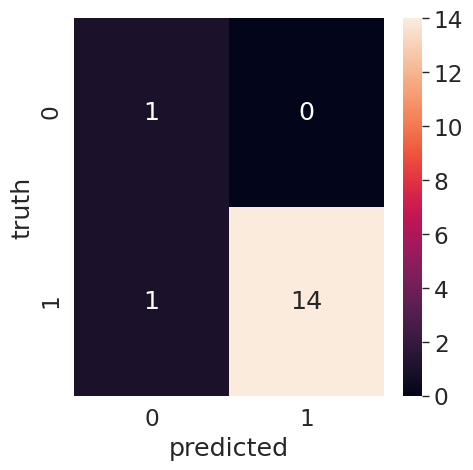

In [64]:
from sklearn.metrics import f1_score
print(f1_score(Y_test, yhat))

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, yhat))

from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_test, yhat))

from sklearn.metrics import recall_score
print(recall_score(Y_test,yhat))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, yhat)

import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')
plt.savefig('RandomForestclinical_Externaldata_1_CM_test_result')
plt.show()


In [61]:
Y_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [62]:
yhat

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])